Module import

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Solve the following initial value differential equation $$ y'=\lambda y,  \quad  y(0)=y_0$$

Fuction Define

In [21]:
# analysis 함수 
def anal(x, lamb):
    return np.exp(lamb*x)

# n : w 개수, w : weight
def y(x, w, n = 4):
    y = 1         # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4)
    for i in range(1, n+1):
        y += w[i-1]*(x**i)
    
    return y

def yprime(x, w, n = 4):
    yprime = 0    # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3)
    for i in range(1, n + 1):
        yprime += i*w[i-1]*(x**(i-1))

    return yprime

def f(y, lamb):
    return lamb*y

Parameter

In [22]:
# 최대 x 범위 : 0 <= x < x_max, lambda 값
x_max = 1
x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))
lamb = -2

# 차수, weight 개수
n = 4
w = tf.Variable(tf.random.normal(shape=(n,), dtype=tf.float32)) # w = [weight1, weight2, weight3, weight4]

# 변화 w 값, loss 저장
w_trace = []
w_trace.append(w.numpy())
loss_trace = []

#  학습률 조정
learning_rate = 0.01
# EPOCH = 100

# 원하는 loss 값에 도달할 때 까지 Epoch 횟수 올리기
Epoch = 0
target_loss = 0.001

Train

In [27]:
# 학습 과정
while True:
    Epoch += 1
    for x_unit in x:
        with tf.GradientTape() as tape:
            # 예측 값
            predict = y(x_unit, w, n)
            loss = tf.math.sqrt(tf.square(f(predict, lamb) - yprime(x_unit, w, n)))
            loss_trace.append(loss.numpy())
            gradients = tape.gradient(loss, w)
            # 오차
            w_trace.append(w.numpy())
            w = tf.Variable(w - learning_rate*gradients)
    if loss.numpy() < target_loss:
        break
    if Epoch % 1000 == 0:
        print('Epoch : {}, Loss : {:.4f}'.format(Epoch, float(loss)))

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

weight 값 출력

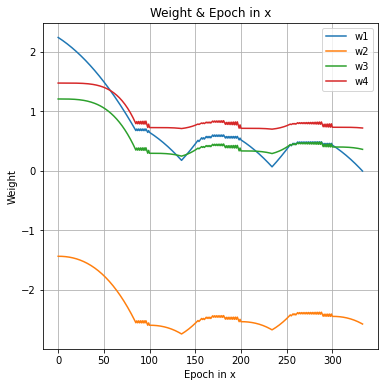

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Weight & Epoch in x')
ax.set_xlabel('Epoch in x')
ax.set_ylabel('Weight')
ax.plot(w_trace, label = ['w1', 'w2', 'w3', 'w4'])
ax.tick_params(labelsize=10)
ax.legend(fontsize=10)
ax.grid()

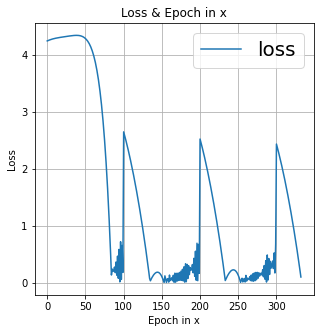

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Loss & Epoch in x')
ax.set_xlabel('Epoch in x')
ax.set_ylabel('Loss')
ax.plot(loss_trace, label = 'loss')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

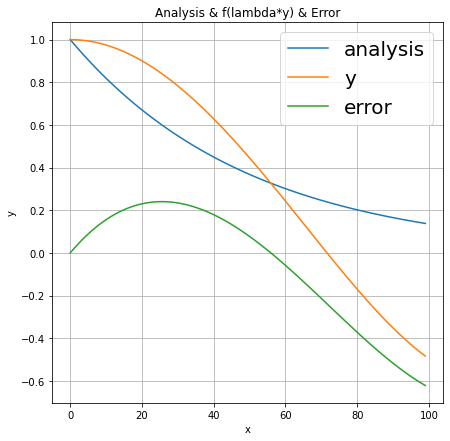

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Analysis & f(lambda*y) & Error')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(anal(x,lamb), label = 'analysis')
ax.plot(y(x, w, n), label = 'y')
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

In [ ]:
np.exp(lamb*1)

0.1353352832366127

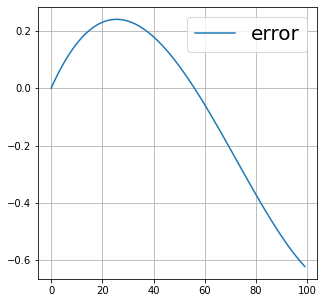

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

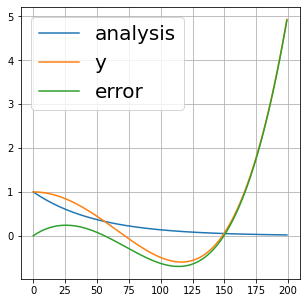

In [ ]:
x = tf.Variable([0.01*n for n in range(200)], dtype = tf.float32)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(anal(x,lamb), label = 'analysis')
ax.plot(y(x, w, n), label = 'y')
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

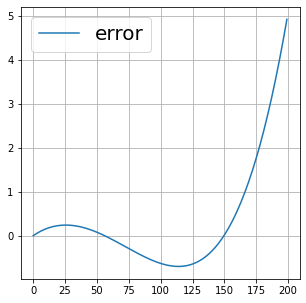

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

In [ ]:
# 2022.07.20
# 에러 그래프 부분 보강
# epoch 늘려서 학습 결과 찾기
# w 값 
# w1 = lambda와 비슷하게 -2
# w2 = 2
# w3 = -1
# w4 = 0.5
# layer 구조 확인

In [ ]:
print(Epoch)

4


In [ ]:
print(loss)

tf.Tensor([0.00022185], shape=(1,), dtype=float32)
